<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("../data/states_edu.csv")  # just reading in data
print(df.shape)
df.head()


(1715, 25)


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [3]:
# standardize total revenue, create new category: percent of expenditure on instruction (PEI)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

rev_normalized = scaler.fit_transform(df.FEDERAL_REVENUE.values.reshape(-1,1))
df['PEI'] = df.INSTRUCTION_EXPENDITURE/df.TOTAL_EXPENDITURE
df['REVENUE_NORMALIZED'] = rev_normalized

print(df.head)

<bound method NDFrame.head of              PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
""" cols i care about: 
state and year (no missing info), 
total revenue
total and instruction expenditure,
grades_4_g, 8_g,
avg math 4, math 8, reading 4, reading 8

['STATE', 'YEAR', 'TOTAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'GRADES_4_G', 'GRADES_8_G', 'AVG_MATH_8_SCORE', 'AVG_MATH_4_SCORE', 'AVG_READING_8_SCORE', 'AVG_READING_4_SCORE']
"""
# choosing only the subsets that I need to get dropped (honestly dropna() would've been fine)
df.dropna(subset=['STATE', 'YEAR', 'TOTAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'AVG_MATH_8_SCORE'], inplace=True)



In [5]:
df.isna().sum()

PRIMARY_KEY                      0
STATE                            0
YEAR                             0
ENROLL                          42
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               42
CAPITAL_OUTLAY_EXPENDITURE       0
GRADES_PK_G                      4
GRADES_KG_G                      0
GRADES_4_G                       0
GRADES_8_G                       0
GRADES_12_G                      0
GRADES_1_8_G                    42
GRADES_9_12_G                   42
GRADES_ALL_G                     0
AVG_MATH_4_SCORE                 0
AVG_MATH_8_SCORE                 0
AVG_READING_4_SCORE             40
AVG_READING_8_SCORE             82
PEI                              0
REVENUE_NORMALIZED               0
dtype: int64

In [6]:
df.columns  # checking col names since I added two cols

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'PEI',
       'REVENUE_NORMALIZED'],
      dtype='object')

<h2>Exploratory Data Analysis (EDA) </h2>

How many different years of data are in our dataset? Use a pandas function.

Chosen Predictor for Test: **<avg grade 4 reading>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Predictor Score in the questions refers to the predictor variable you chose here.

In [7]:
#years covered
df.YEAR.unique()  # 9 unique years

array([1992, 2000, 2003, 2005, 2007, 2009, 2011, 2013, 2015])

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [8]:
#2019 is not in my dataset (and others are also missing)
predictor = 'AVG_MATH_8_SCORE'
mich = df.loc[df['STATE'] == 'MICHIGAN']
oof = df.loc[df['STATE'] == 'OHIO']

mich[predictor].mean() - oof[predictor].mean()

-6.555555555555543

quite unfortunate... also that wasn't over every year, but i wanted to get to graphing

Find the average for your pedictor score across all states in 2019

In [9]:
#dataset i used only goes up to 2015
scores = df.loc[df['YEAR'] == 2015]

scores[predictor].mean()

281.72549019607845

Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [10]:
# I couldn't think/look up what the easy function was so I just did a loop with finding the max
x = df.STATE.unique()
x.sort()

state_best_score = np.empty(51)

for index, state in enumerate(x):
    print(index, state, df.loc[df['STATE'] == state][predictor].max())
    state_best_score[index] = (df.loc[df['STATE'] == state][predictor].max())

0 ALABAMA 269.0
1 ALASKA 283.0
2 ARIZONA 283.0
3 ARKANSAS 279.0
4 CALIFORNIA 276.0
5 COLORADO 292.0
6 CONNECTICUT 289.0
7 DELAWARE 284.0
8 DISTRICT_OF_COLUMBIA 265.0
9 FLORIDA 281.0
10 GEORGIA 279.0
11 HAWAII 281.0
12 IDAHO 287.0
13 ILLINOIS 285.0
14 INDIANA 288.0
15 IOWA 286.0
16 KANSAS 290.0
17 KENTUCKY 282.0
18 LOUISIANA 273.0
19 MAINE 289.0
20 MARYLAND 288.0
21 MASSACHUSETTS 301.0
22 MICHIGAN 280.0
23 MINNESOTA 295.0
24 MISSISSIPPI 271.0
25 MISSOURI 286.0
26 MONTANA 293.0
27 NEBRASKA 286.0
28 NEVADA 278.0
29 NEW_HAMPSHIRE 296.0
30 NEW_JERSEY 296.0
31 NEW_MEXICO 274.0
32 NEW_YORK 283.0
33 NORTH_CAROLINA 286.0
34 NORTH_DAKOTA 293.0
35 OHIO 290.0
36 OKLAHOMA 279.0
37 OREGON 285.0
38 PENNSYLVANIA 290.0
39 RHODE_ISLAND 284.0
40 SOUTH_CAROLINA 282.0
41 SOUTH_DAKOTA 291.0
42 TENNESSEE 278.0
43 TEXAS 290.0
44 UTAH 286.0
45 VERMONT 295.0
46 VIRGINIA 289.0
47 WASHINGTON 290.0
48 WEST_VIRGINIA 274.0
49 WISCONSIN 289.0
50 WYOMING 288.0


<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [11]:
# Done before

Final feature list: **<PEI, REVENUE_NORMALIZED, MATH_8_GRADE>**

Feature selection justification: **<I wanted to see if there were trends that would make it possible to predict the 8th grade math scores... more details in conclusion>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

Text(0, 0.5, 'Average 8th Grade Math Score')

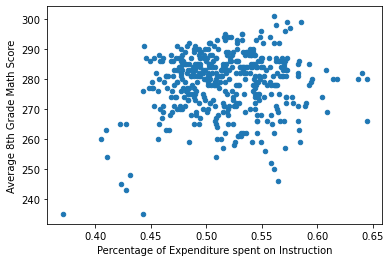

In [12]:
df.plot.scatter(x='PEI', y=predictor)
plt.xlabel('Percentage of Expenditure spent on Instruction')
plt.ylabel('Average 8th Grade Math Score')

**<Average 8th Grade Math Score vs. Percentage of Expenditure spent on Instruction>**

It is still hard to find a trend, it's really just a cluster centering ~280

**Visualization 2**

Text(0, 0.5, 'Average 8th Grade Math Score')

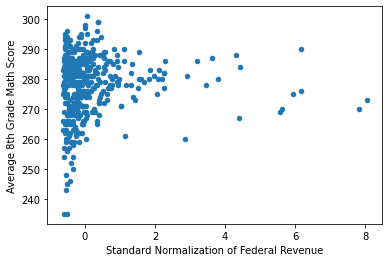

In [13]:
df.plot.scatter(x='REVENUE_NORMALIZED', y=predictor)
plt.xlabel('Standard Normalization of Federal Revenue')
plt.ylabel('Average 8th Grade Math Score')

Also does not really show a trend. Maybe a log curve is possible?

Text(0, 0.5, 'Average 8th Grade Math Score')

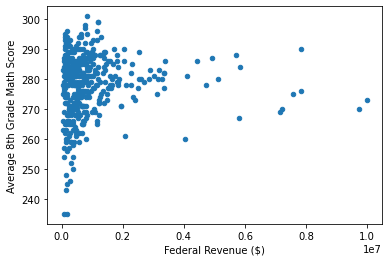

In [14]:
df.plot.scatter(x='FEDERAL_REVENUE', y=predictor)
plt.xlabel('Federal Revenue ($)')
plt.ylabel('Average 8th Grade Math Score')

**<Very similar to previous graph. Maybe a log curve is still possible?>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# def custom_round(x, base=5):
#     return int(base * round(float(x)/base)) # curious about turning this into a classification problem with ranges (*binning)


In [17]:
X = df[['REVENUE_NORMALIZED', 'PEI']].dropna()
# X = df[['TOTAL_REVENUE','GRADES_8_G', 'REVENUE_NORMALIZED', 'PEI']].dropna()
y = df.loc[X.index][predictor]
# y = df.loc[X.index][predictor].apply(lambda x: custom_round(x, 10))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.4, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<CLASSIFICATION>**

In [19]:
# import your sklearn class here
from sklearn import svm

In [20]:
# create your model here
model = svm.SVR()

In [21]:
model.fit(X_train, y_train)

SVR()

In [22]:
y_pred = model.predict(X_test)

In [23]:
# # FOR CLASSIFICATION ONLY:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(model, X_test, y_test,
#                          cmap=plt.cm.Blues)

In [24]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred))

In [25]:
# mean error
np.mean(model.predict(X_test)-y_test)

2.8384260110150907

In [26]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

8.188010193492888

In [27]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

11.12224926225288

Text(0, 0.5, '8th grade math scores')

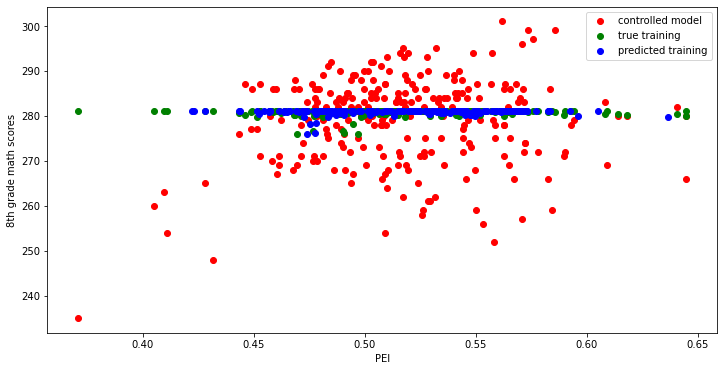

In [28]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'PEI'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

# new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
# intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
# plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("8th grade math scores")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**

I wanted to see if there was a correlation between either federal funding (which was standardized) or the percent of a state's expenditure that was spent on education (to try and normalize small and large populuted states). I used the svm (in the hopes that it would be able to delineate between the clusters and find a trend in multiple dimensions) but ultimately it didn't find an extremely strong correlation. I tried to find correlations using SVC() for classification and SVR for regression. Ultimately, this wasn't successful and the regression model I trained would not be able to very accurately predict the 8th grade math score.

For Classification: I tried using the binning technique. I treated them as categorical data rounded to the nearest 5 points and 10 points. In both cases, the classifier was bad. It scored an 18% accuracy for binning every 5 and a 46% accuracy when binning to the nearest 10. When looking at the confusion matrix, nearly every prediction was 280. This tells me that the classifier was basically generalizing all of the data to 280 (fun fact i'm writing this in my eecs280 class rn :OO) which shouldn't really happen if there was a more obvious trend.

For Regression: I tried the other combining features and normalization techniques. For normalization I used the StandardScaler() to create the 'REVENUE_NORMALIZED' feature and for combining features I used a percentage of the expenditure spent on instruction over total expenditure ('PEI'). I ultimately didn't feel a logarithmic curve would work (though I probably should have tested it) because everything looked so clustered. I also only used the two features that I made because I wanted to test how clear (if any) a relationship between these features were (I guess it's also worth noting I tried this with 'year' and '# of students enrolled' as parameters and it didn't really increase accuracy/precision/f1score). 

Recommendations: I feel like a large portion of the dataset got cleaned out because part of it was not fully filled. There were only 9 unique years and a potential of 51 rows per year (50 states + DC) which would be a maximum of 459 datapoints for training and testing total-- which is not much for an ml project. So my recommendation would be to focus on collecting data; speicifically from schools in a single city so the data are more similar.

(sorry it's more than one paragraph)